# Group 1

Fabio Ceruti - Fabio Martino - Alex Lucchini - Jacopo Biggiogera

This notebook contains the summarized results of the obtained clusters of species. More precisely, it compares four different types of clusters: clusters of standard images (standard clusters), clusters of masked images (context clusters), clusters of filled masked images (filled clusters), and clusters of only bboxes (bboxes clusters).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
context_clusters = pd.read_csv('context_predictions.csv')
standard_clusters = pd.read_csv('standard_predictions.csv')
filled_clusters = pd.read_csv('avg_contexts_predictions.csv')
bboxes_clusters = pd.read_csv('bbcontent_predictions.csv')

The function below builds the confusion matrix of a given cluster. More precisely, each column corresponds to the distribution of labels within each cluster. Ideally, each cluster would contain only one species, meaning one label with 100% of relative frequency. Thus, the function also computes a dispersion loss of the clusters: the sparser the labels within each cluster, the higher the loss (in absolute terms).

In [ ]:
def confusion(preds):
    totals = preds.groupby('clusters').count().reset_index()['label']
    clusters = set(preds['clusters'])
    clusters = list(clusters)
    fractions = pd.DataFrame()
    for i in range(len(clusters)):
      col = []
      for j in set(preds['label']):
        fraction = len(preds.loc[(preds['clusters'] == clusters[i])&(preds['label'] == j), 'label'])*100/totals[i]
        col.append(fraction)
      fractions[f'Cluster {clusters[i]}'] = col

    disp = []
    for i in range(len(fractions.columns)):
      probs = fractions.loc[fractions[fractions.columns[i]] > 0, fractions.columns[i]]/100
      divg = np.log(np.prod(probs))
      disp.append(divg)

    print(f'Dispersion Loss: {np.mean(disp)}')
    return fractions

# Context Clusters

In [59]:
confusion(context_clusters) #Confusion matrix of context clusters.

Dispersion Loss: -27.513258170627267


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
0,17.1875,3.164557,1.123596,22.916667,9.523810,6.578947,3.773585,10.576923,2.272727,0.000000,21.428571,12.230216
1,0.0000,34.177215,0.000000,0.000000,7.142857,11.842105,0.000000,0.000000,10.227273,0.000000,0.000000,7.194245
2,9.3750,6.329114,0.000000,0.000000,16.666667,18.421053,0.943396,0.000000,21.590909,1.388889,9.523810,12.230216
3,1.5625,0.000000,0.000000,35.416667,2.380952,1.315789,1.886792,4.807692,6.818182,2.777778,38.095238,21.582734
4,29.6875,0.632911,0.000000,9.375000,2.380952,5.263158,23.584906,0.961538,36.363636,0.000000,4.761905,0.719424
5,6.2500,1.898734,0.000000,13.541667,13.095238,2.631579,45.283019,2.884615,3.409091,9.722222,4.761905,1.438849
6,1.5625,3.164557,19.101124,0.000000,10.714286,4.605263,0.000000,1.923077,1.136364,69.444444,0.000000,5.755396
7,1.5625,1.265823,41.573034,4.166667,1.190476,3.289474,2.830189,42.307692,1.136364,1.388889,2.380952,0.000000
8,6.2500,13.291139,1.123596,0.000000,11.904762,24.342105,3.773585,4.807692,5.681818,0.000000,0.000000,7.194245
9,7.8125,20.886076,7.865169,2.083333,9.523810,9.210526,7.547170,11.538462,4.545455,0.000000,0.000000,5.035971


The idea for this code is that the label appearing with the highest frequency in a cluster is the one which is going to be "predicted" by such cluster. Thus, the code below builds a bar plot, showing each predicted label with its associated frequency in its corresponding cluster. Therefore, if a label does not appear in such bar plot, it's because it has never been predicted by a cluster.

Dispersion Loss: -27.513258170627267


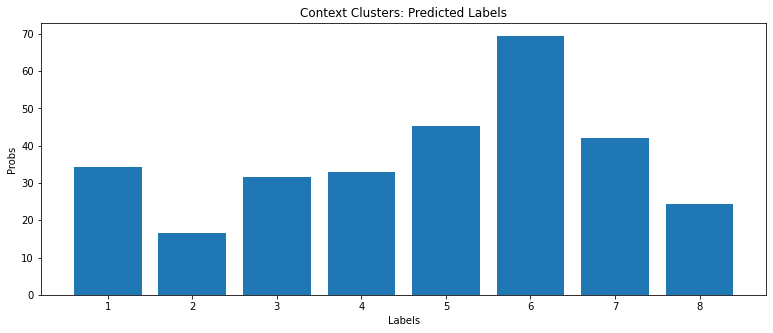

In [93]:
df = confusion(context_clusters)
context_max = []

for i in range(len(df.columns)):
    context_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df1 = pd.DataFrame()
df1['pred_labels'] = labels
df1['pred_probs'] = probs

df1 = df1.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df1 = df1.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(13, 5))
plt.bar(df1['pred_labels'], df1['pred_probs'])
plt.title('Context Clusters: Predicted Labels')
plt.xticks(df1['pred_labels'])
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()
#df1

As it's possible to see, labels 0, 9, 10, and 11 are never predicted by any cluster. Meanwhile, label 6 is the only one predicted with high probability, possibily suggesting that context alone enables to distinguish such species (Pandion haliaetus).

The heatmap below provides an intuitive representation of the confusion matrix. The darker each square, the higher the probability associated with such label within a specific cluster.

Dispersion Loss: -27.513258170627267


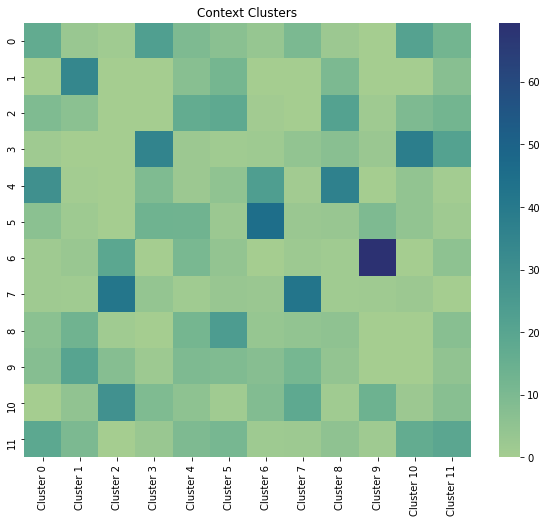

In [90]:
import seaborn as sb
plt.figure(figsize = (10,8))
sb.heatmap(confusion(context_clusters), cmap = 'crest')
plt.title('Context Clusters')
plt.show()

# Filled Clusters

In [17]:
confusion(filled_clusters) #Confusion matrix of filled clusters

Dispersion Loss: -25.03840456961085


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
0,1.265823,6.818182,6.666667,20.000000,13.580247,6.944444,0.000000,1.538462,2.777778,1.587302,0.000000,24.770642
1,2.531646,0.000000,0.952381,10.000000,8.641975,4.861111,0.000000,0.000000,12.037037,0.000000,45.454545,0.000000
2,27.848101,2.272727,0.000000,8.666667,17.283951,14.583333,0.000000,0.000000,18.518519,0.000000,5.785124,0.000000
3,0.000000,6.060606,1.904762,6.666667,2.469136,13.888889,0.000000,6.153846,9.259259,1.587302,0.000000,39.449541
4,0.000000,16.666667,4.761905,2.666667,28.395062,13.888889,0.000000,0.000000,7.407407,0.000000,0.826446,15.596330
5,2.531646,50.757576,2.857143,2.000000,3.703704,1.388889,2.325581,9.230769,2.777778,3.174603,0.826446,6.422018
6,6.329114,0.000000,0.000000,4.666667,0.000000,0.000000,2.325581,78.461538,1.851852,46.031746,4.132231,0.000000
7,0.000000,3.787879,43.809524,4.000000,0.000000,3.472222,48.837209,0.000000,3.703704,14.285714,0.826446,2.752294
8,1.265823,0.000000,5.714286,19.333333,6.172840,21.527778,0.000000,1.538462,16.666667,0.000000,7.438017,0.000000
9,0.000000,2.272727,22.857143,7.333333,4.938272,8.333333,9.302326,0.000000,9.259259,1.587302,22.314050,3.669725


Dispersion Loss: -25.03840456961085


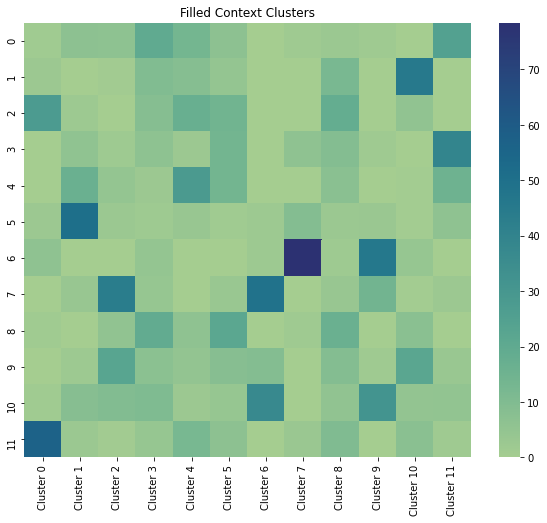

In [89]:
import seaborn as sb
plt.figure(figsize = (10,8))
sb.heatmap(confusion(filled_clusters), cmap = 'crest')
plt.title('Filled Context Clusters')
plt.show()

Dispersion Loss: -25.03840456961085


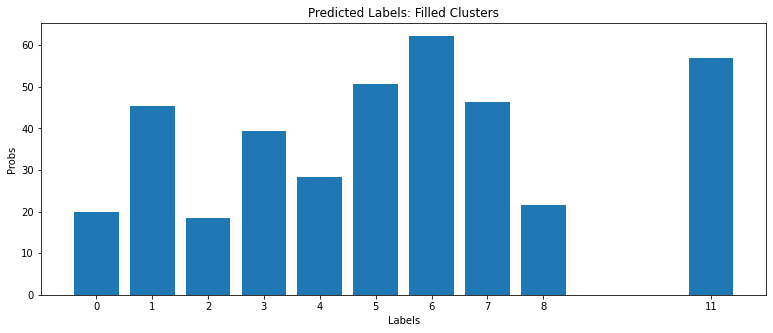

In [94]:
df = confusion(filled_clusters)
filled_max = []

for i in range(len(df.columns)):
    filled_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df2 = pd.DataFrame()
df2['pred_labels'] = labels
df2['pred_probs'] = probs

df2 = df2.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df2 = df2.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(13, 5))
plt.bar(df2['pred_labels'], df2['pred_probs'])
plt.xticks(df2['pred_labels'])
plt.title('Predicted Labels: Filled Clusters')
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()

As it's possible to see, filling the black masks with the average color of the image marginally improves the performance of clustering. The dispersion loss slighly decreases, and now both labels 0 and 11 are identified, the latter with also high probability.

# Standard Clusters

In [95]:
confusion(standard_clusters) #Confusion matrix of standard clusters

Dispersion Loss: -16.70102147178103


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
0,64.864865,0.000000,0.000000,0.000000,0.0,13.178295,0.000000,0.0,0.000000,4.918033,1.904762,3.296703
1,0.000000,33.757962,1.176471,0.000000,0.0,25.581395,0.000000,0.0,0.000000,0.000000,11.428571,1.098901
2,1.801802,1.910828,34.117647,0.000000,0.0,5.426357,0.000000,0.0,0.000000,0.000000,11.428571,51.648352
3,10.810811,0.000000,1.176471,98.591549,0.0,1.550388,0.000000,0.0,1.098901,1.639344,11.428571,0.000000
4,8.108108,0.636943,0.000000,1.408451,0.0,0.775194,5.617978,100.0,0.000000,0.819672,13.333333,0.000000
5,8.108108,0.000000,1.176471,0.000000,0.0,0.000000,94.382022,0.0,0.000000,1.639344,3.809524,0.000000
6,0.000000,0.000000,2.352941,0.000000,100.0,6.976744,0.000000,0.0,0.000000,6.557377,0.000000,0.000000
7,0.900901,0.000000,1.176471,0.000000,0.0,1.550388,0.000000,0.0,23.076923,60.655738,0.952381,0.000000
8,1.801802,22.929936,1.176471,0.000000,0.0,17.054264,0.000000,0.0,0.000000,1.639344,34.285714,1.098901
9,0.000000,38.853503,0.000000,0.000000,0.0,14.728682,0.000000,0.0,1.098901,11.475410,4.761905,0.000000


Dispersion Loss: -16.70102147178103


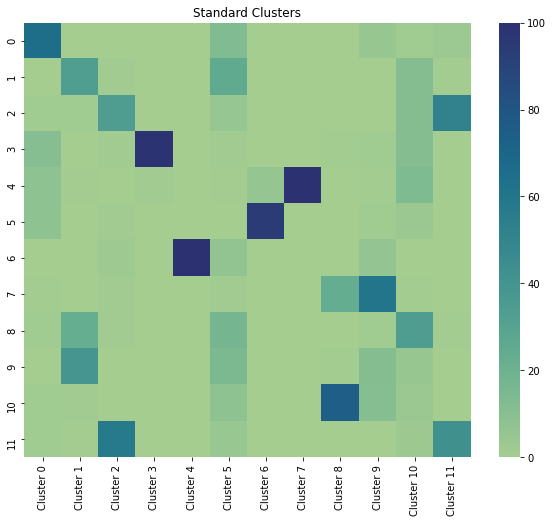

In [66]:
import seaborn as sb
plt.figure(figsize = (10,8))
sb.heatmap(confusion(standard_clusters), cmap = 'crest')
plt.title('Standard Clusters')
plt.show()

Dispersion Loss: -16.70102147178103


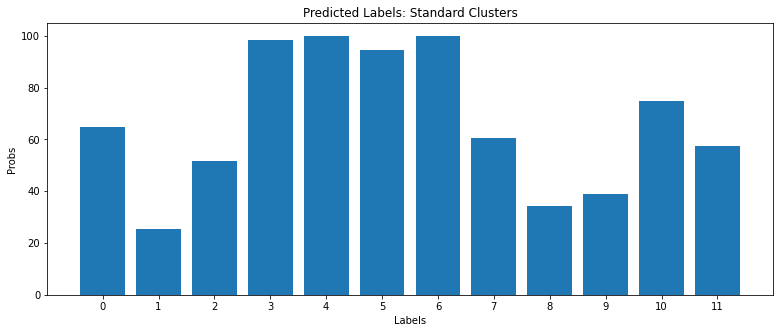

In [96]:
df = confusion(standard_clusters)
standard_max = []

for i in range(len(df.columns)):
    standard_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df3 = pd.DataFrame()
df3['pred_labels'] = labels
df3['pred_probs'] = probs

df3 = df3.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df3 = df3.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(13, 5))
plt.bar(df3['pred_labels'], df3['pred_probs'])
plt.xticks(df3['pred_labels'])
plt.title('Predicted Labels: Standard Clusters')
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()

As it's possible to see, using the whole images significantly improves the performance of clustering: the dispersion loss significantly decreases, all the labels are now recognized, six of which with high probability.

# BBoxes Clusters

In [97]:
confusion(bboxes_clusters) #Confusion matrix of standard clusters

Dispersion Loss: -10.78488340055864


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11
0,0.0,10.191083,0.0,2.702703,100.0,1.388889,0.787402,1.724138,1.098901,1.234568,0.000000,0.000000
1,0.0,5.732484,0.0,0.000000,0.0,0.000000,0.000000,13.793103,0.000000,0.000000,3.030303,97.222222
2,0.0,17.834395,0.0,0.000000,0.0,0.000000,51.968504,5.172414,0.000000,0.000000,0.000000,0.000000
3,100.0,8.280255,0.0,0.000000,0.0,0.000000,0.000000,8.620690,0.000000,0.000000,0.000000,0.000000
4,0.0,8.917197,100.0,0.000000,0.0,0.000000,0.000000,4.310345,1.098901,0.000000,0.000000,0.000000
5,0.0,6.369427,0.0,0.000000,0.0,0.000000,0.000000,0.862069,97.802198,0.000000,0.000000,0.000000
6,0.0,0.636943,0.0,9.909910,0.0,91.666667,0.000000,18.965517,0.000000,0.000000,0.000000,0.000000
7,0.0,0.636943,0.0,80.180180,0.0,0.000000,0.000000,8.620690,0.000000,0.000000,0.000000,0.000000
8,0.0,11.464968,0.0,0.000000,0.0,0.000000,0.000000,8.620690,0.000000,0.000000,46.969697,2.777778
9,0.0,11.464968,0.0,4.504505,0.0,1.388889,0.000000,8.620690,0.000000,0.000000,50.000000,0.000000


Dispersion Loss: -10.78488340055864


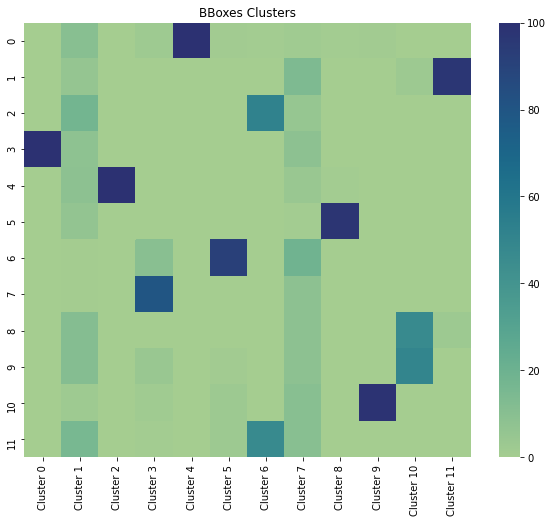

In [98]:
import seaborn as sb
plt.figure(figsize = (10,8))
sb.heatmap(confusion(bboxes_clusters), cmap = 'crest')
plt.title('BBoxes Clusters')
plt.show()

Dispersion Loss: -10.78488340055864


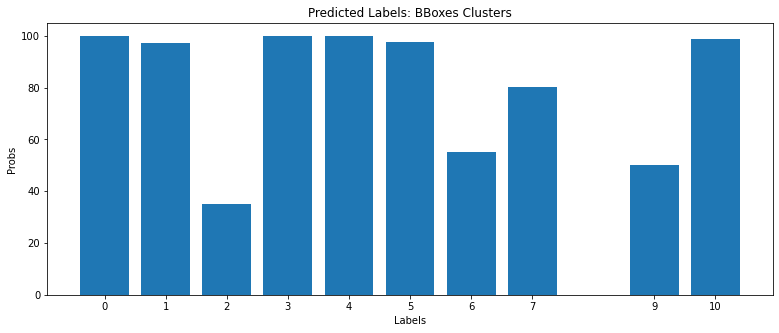

In [99]:
df = confusion(bboxes_clusters)
bboxes_max = []

for i in range(len(df.columns)):
    bboxes_max.append(df[df.columns[i]].max())
    
labels = []
probs = []
for i in range(len(df.columns)):
    labels.append(df[df.columns[i]].argmax())
    probs.append(df[df.columns[i]].max())

df4 = pd.DataFrame()
df4['pred_labels'] = labels
df4['pred_probs'] = probs

df4 = df4.sort_values('pred_probs', ascending = False).reset_index(drop = True)
df4 = df4.groupby('pred_labels').mean().reset_index()
plt.figure(figsize=(13, 5))
plt.bar(df4['pred_labels'], df4['pred_probs'])
plt.xticks(df4['pred_labels'])
plt.title('Predicted Labels: BBoxes Clusters')
plt.xlabel('Labels')
plt.ylabel('Probs')
plt.show()

As it's possible to see, using bboxes allows to focus on the actual animals, therefore most labels are predicted with almost 100% probability, showing almost pure clusters.

# Clusters Comparison

This section is dedicated to compare the performance of the four types of clusters.

In [73]:
#Generation of a single dataframe with the predicted labels and their corrisponding probabilities of all four types of clusters.
comp = pd.merge(df1, df2, on = 'pred_labels', how = 'outer')
comp = comp.rename({'pred_probs_x':'context_probs', 'pred_probs_y':'filled_probs'}, axis = 1)
comp = pd.merge(comp, df3, on = 'pred_labels', how = 'outer')
comp = comp.rename({'pred_probs':'standard'}, axis = 1)
comp = pd.merge(comp, df4, on = 'pred_labels', how = 'outer')
comp = comp.rename({'pred_probs':'bboxes'}, axis = 1)
comp = comp.fillna(0)
comp = comp.sort_values('pred_labels')
comp

,pred_labels,context_probs,filled_probs,standard,bboxes
8,0,0.000000,20.000000,64.864865,100.000000
0,1,34.177215,45.454545,25.581395,97.222222
1,2,16.666667,18.518519,51.648352,34.901449
2,3,31.698213,39.449541,98.591549,100.000000
3,4,33.025568,28.395062,100.000000,100.000000
4,5,45.283019,50.757576,94.382022,97.802198
5,6,69.444444,62.246642,100.000000,55.316092
6,7,41.940363,46.323367,60.655738,80.180180
7,8,24.342105,21.527778,34.285714,0.000000
10,9,0.000000,0.000000,38.853503,50.000000


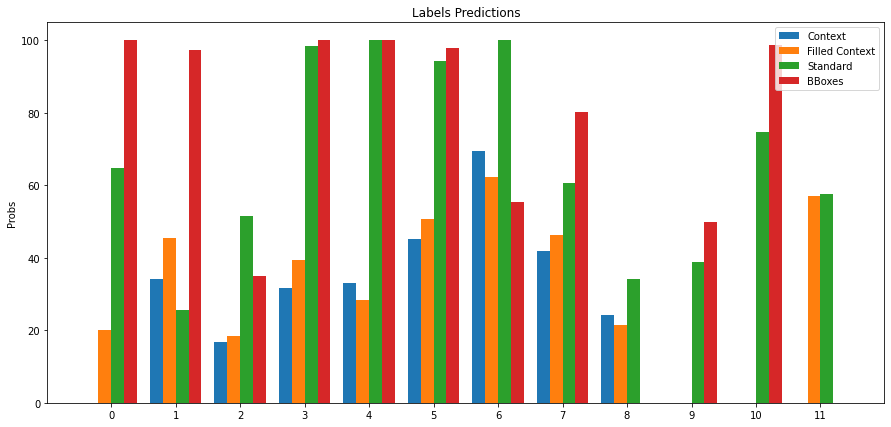

In [74]:
x = np.arange(12)
width = 0.2
plt.figure(figsize=(15, 7))
plt.bar(x - 0.3, comp['context_probs'], width, label = 'Context')
plt.bar(x - 0.1, comp['filled_probs'], width, label = 'Filled Context')
plt.bar(x + 0.1, comp['standard'], width, label = 'Standard')
plt.bar(x + 0.3, comp['bboxes'], width, label = 'BBoxes')
plt.xticks(comp['pred_labels'])
plt.ylabel('Probs')
plt.title('Labels Predictions')
plt.legend()
plt.show()

The plot bar above compares the predicted probabilities of each label by all four types of clusters. As it's possible to see, for most labels there exists an increasing trend: when moving from clusters to bboxes, the purity associated with each prediction increases, suggesting that for species identification using only the bboxes may be the best approach. Furthermore, for labels 0, 9, and 10 (for the names see cell below), using contexts does not allow to identify them, suggesting that for these species context may provide no information. 
Species 6 results to be the most interesting: the purity of the prediction decreases when moving from context to bboxes, suggesting that for this specific species the context may actually be of importance for its identification.

In [100]:
train_val = pd.read_csv('train_val_data_2.csv')
print(train_val.loc[train_val['label'] == 9, 'path'].iloc[0].split('/')[-2])
print(train_val.loc[train_val['label'] == 10, 'path'].iloc[0].split('/')[-2])
print(train_val.loc[train_val['label'] == 11, 'path'].iloc[0].split('/')[-2])

Sciurus carolinensis
Spinus tristis
Trachemys scripta elegans
